In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import find_peaks, peak_widths
from scipy.optimize import curve_fit

plt.rcParams.update({"font.size": 14, "font.family": "serif"})

In [2]:
data = pd.read_csv("./data/a0.csv", sep=",")
t, ch1, ch2 = data["Time [s]"], data['CH0 [V]'], data["CH1 [V]"]

data0 = pd.read_csv("./data/a1.csv", sep=",")
t0, ch10, ch20 = data0["Time [s]"], data0['CH0 [V]'], data0["CH1 [V]"]

In [3]:
data

,Time [s],CH0 [V],CH1 [V],Unnamed: 3
0,1.792000,-0.34,0.08,NaN
1,1.792008,-0.34,0.08,NaN
2,1.792016,-0.34,0.08,NaN
3,1.792024,-0.34,0.08,NaN
4,1.792032,-0.34,0.08,NaN
...,...,...,...,...
3995,1.823960,0.34,3.76,NaN
3996,1.823968,0.36,3.76,NaN
3997,1.823976,0.34,3.76,NaN
3998,1.823984,0.34,3.76,NaN


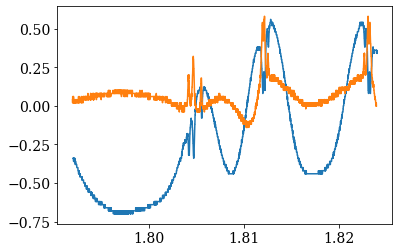

In [4]:
plt.plot(t, ch1)
plt.plot(t0-0.00005, ch10+ch1[0]+0.04 - ch1)

4000


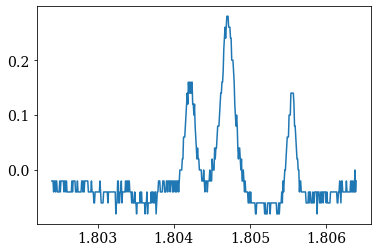

In [5]:
temp = -(ch1-(ch10+ch1[0]))

print(len(temp))
a, b = 1300, 1800
plt.plot(t0[a:b], temp[a:b])

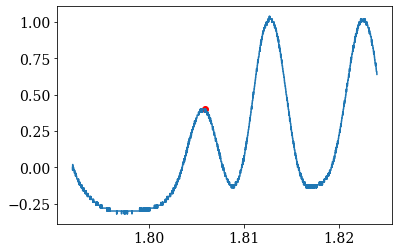

In [6]:
plt.plot(t0, ch10)
peaks, _ = find_peaks(ch10, height=0.3, distance=400)
# plt.scatter(t0[peaks], ch10[peaks], color="red")

shift = 10
plt.scatter(t0[peaks[0]-10], ch10[peaks[0]-10], color="red")

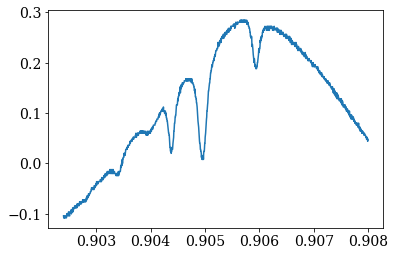

In [7]:
data = pd.read_csv("./data_17.01.2022/abcd.csv")
t, ch1, ch2 = data["Time [s]"], data['CH0 [V]'], data["CH1 [V]"]


a, b = 1600, 3000
# a, b = 0, 3000
t, ch1 = t[a:b], ch1[a:b]
plt.plot(t,ch1)

In [8]:
def func(x, sigma, mean, ampl, const):
    return ampl*np.exp(-(x - mean)**2/(2*sigma**2)) + const

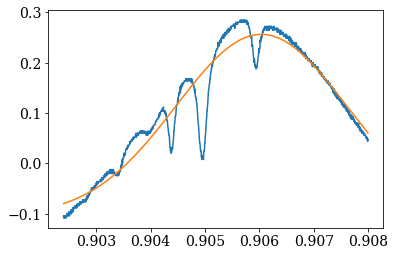

In [9]:
popt, pcov = curve_fit(func, t, ch1, p0=[0.0025, 0.906, 0.55, -0.28])
plt.plot(t, ch1)
plt.plot(t, func(t, *popt))

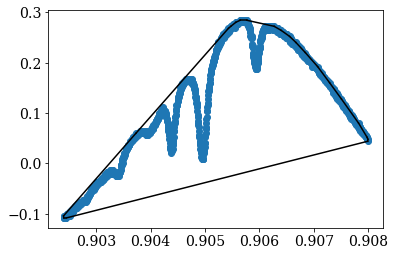

In [10]:
from scipy.spatial import ConvexHull
from scipy import interpolate


points = np.array([t, ch1])


hull = ConvexHull(points.T)
# plt.scatter(points[0], points[1])
plt.plot(points[0], points[1], 'o')
points = points.T
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

In [11]:
def convex_floor(t, ch1, left, right):
    
    points = np.array([t[left:right], ch1[left:right]])
    hull = ConvexHull(points.T)
    idx = hull.vertices
    
    x1, y1 = points[idx].T
    idx_sorted = np.argsort(x1)
    x1, y1 = x1[idx_sorted], y1[idx_sorted]
    
    y_new = f(t)-ch1
    
    return t, y_new


def lorenz(x, g, a, m):
    return a * (g/2)**2 / ((x - m)**2 + (g/2)**2)

def lorenz_sum(x, g1, a1, m1, g2, a2, m2, g3, a3, m3, g4, a4, m4,g5, a5, m5, g6, a6, m6):
    return lorenz(x, g1, a1, m1) + lorenz(x, g2, a2, m2) + lorenz(x, g3, a3, m3) + lorenz(x, g4, a4, m4) + lorenz(x, g5, a5, m5) + lorenz(x, g6, a6, m6)


def gauss(x, s, a, m):
    return a*np.exp(-(x-m)**2/(2*s**2))

134512.13858780597
[ 6.20967873e+00  1.42571181e-02 -2.91084268e+02  1.89275093e+01
  6.32883111e-02 -2.09838936e+02  1.69628390e+01  1.28136142e-01
 -1.31283847e+02  1.66621238e+01  3.54308780e-01 -7.96311860e+01
  2.70292944e+01  4.87493463e-01  0.00000000e+00  2.02510750e+01
  1.97596241e-01  1.29669702e+02]
421.89081612882376


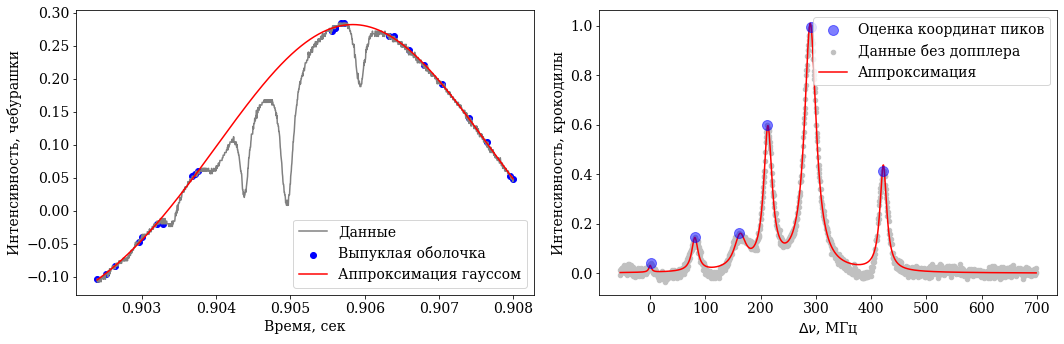

In [13]:
def mode(x, sigma, mu, ampl, const):
    return ampl*np.exp(-(x-mu)**2/(2*sigma**2)) + const

t, ch1 = np.array(t), np.array(ch1)
# idx = hull.vertices
idx = [0, 30, 60,140,150, 200, 220, 800, 320, 330, 340, 790, 800,  820,830, 980, 1000, 1050, 1100, 1160, 1250, 1310, 1390, 1399]
# idx = np.append(idx, [180, 1100])

# x1, y1 = points[idx].T
# idx_sorted = np.argsort(x1)
# x1, y1 = x1[idx_sorted], y1[idx_sorted]


# plt.plot(x1, f(x1))
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(t, ch1, label="Данные", color="gray")
plt.scatter(t[idx], ch1[idx], label="Выпуклая оболочка", color="blue")
plt.xlabel("Время, сек")
plt.ylabel("Интенсивность, чебурашки")


popt, pcov = curve_fit(mode, t[idx], ch1[idx], p0=[0.2, 0.906, 0.15, 0.0])
sigma = popt[0]
fwhm = sigma*np.sqrt(8 * np.log(2))
coef = -0.58 / fwhm * 1e3
print(coef)
plt.plot(t, mode(t, *popt), color="red", label="Аппроксимация гауссом")
plt.legend()

plt.subplot(122)
y = -ch1 + mode(t, *popt)
y /= np.max(y)



peaks, _ = find_peaks(y, height=0.03, distance=90)
peaks = peaks[[0, 1, 2, 3, 4, 6]]

x = np.array(t)
x -= x[peaks[4]]
x *= coef


width, height, left, right = peak_widths(np.array(y), peaks, rel_height=0.5)
step = np.mean(x[1:] - x[:-1])
width *= step

p_init = []
for p, w, h in zip(peaks, width, height):
    g, a, m = w, h, x[p]
    p_init.append([g, a, m])
p_init = np.ravel(p_init)
print(p_init)


popt, pcov = curve_fit(lorenz_sum, x, y, p0=p_init)

g1, a1, m1, g2, a2, m2, g3, a3, m3, g4, a4, m4,g5, a5, m5, g6, a6, m6 = popt
G = np.array([g1, g2, g3, g4, g5, g6])
A = np.array([a1, a2, a3, a4, a5, a6])
M = [m1, m2, m3, m4, m5, m6]


temp_m = m1
temp_a = np.max(A)
x -= temp_m
y /= temp_a

M -= temp_m
A /= temp_a

popt_corrected = []
for i in range(6):
    popt_corrected.append(G[i])
    popt_corrected.append(A[i])
    popt_corrected.append(M[i])
    
print(M[-1])
    
plt.scatter(np.array(x)[peaks], np.array(y)[peaks], color="blue", label="Оценка координат пиков", s=100, alpha=0.5, zorder=3)
plt.scatter(x, y, color="silver", label="Данные без допплера", s=20)
plt.plot(x, lorenz_sum(x, *popt_corrected), color="red", label="Аппроксимация")

plt.xlabel("$\\Delta \\nu$, МГц")
plt.ylabel("Интенсивность, крокодилы")

plt.legend()
plt.tight_layout()

# plt.savefig("/Users/goloshch/Desktop/Материалы/КРФ ФИАН/SaturatedRb/images/sat_method.pdf")

In [14]:
G = np.abs(G)
print(np.abs(G))

[ 5.80557782 13.76402359 25.74386608 18.289726   25.67973745 14.93344784]


In [15]:
c1 = 0.0
c2 = 156.947
c3 = c1 + c2 + 266.650

c12 = (c1+c2)/2
c23 = (c2+c3)/2
c13 = (c1+c3)/2

theor_cord = np.sort([c1, c2, c3, c12, c23, c13])

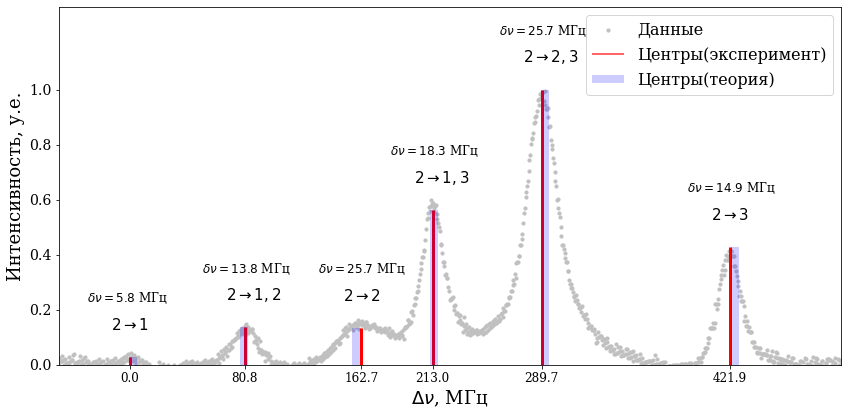

In [23]:
plt.figure(figsize=(12,6))

a, b = 0, -300
plt.scatter(x[a:b], y[a:b], color="silver", label="Данные", s=10)

names = ["$2 \\rightarrow 1$", "$2\\rightarrow 1,2$", "$2 \\rightarrow 2$", "$2\\rightarrow 1,3$", "$2\\rightarrow 2,3$", "$2 \\rightarrow 3$"]

for g, a, m, n, fwhm in zip(G, A, M, names, G):
    plt.vlines(x=m, ymin=0.0, ymax=a, color="red", linewidth=3)
    plt.annotate(xy=(m-13, a+0.1), text=n, fontsize=15)
    plt.annotate(xy=(m-30, a+0.2), text="$\delta \\nu ={}$ МГц".format(round(fwhm,1)), fontsize=12)
plt.vlines(x=0.0, ymin=0.0, ymax=0.0, color="red", label="Центры(эксперимент)", zorder=10, alpha=0.8)
    
for g, a, m in zip(G, A, theor_cord):
    plt.vlines(x=m+2, ymin=0.0, ymax=a, color="blue", linewidth=8, alpha=0.2)
plt.vlines(x=0.0, ymin=0.0, ymax=0.0, color="blue", label="Центры(теория)", linewidth=8, alpha=0.2)
    
    
# plt.axhline(color="black", alpha=0.5)
plt.xlim(-50, 500)
plt.ylim(0.0, 1.3)


plt.xticks(M, fontsize=12)
plt.yticks(np.arange(0.0, 1.1, 0.2))

# plt.title("Сверхтонкие подуровни + Кроссоверы", fontsize=18)
plt.xlabel("$\\Delta \\nu$, МГц", fontsize=18)
plt.ylabel("Интенсивность, у.е.", fontsize=18)

plt.tight_layout()
plt.legend(fontsize=16)

plt.savefig("/Users/goloshch/Desktop/Материалы/КРФ ФИАН/SaturatedRb_ВПВ/Тезис/sat_spectrum.pdf")

In [ ]:
y_new = f(t)-ch1
plt.plot(t, y_new)

kernel_size = 5
kernel = np.ones(kernel_size)/kernel_size
y_conv = np.convolve(y_new, kernel, mode="same")
plt.plot(t, y_conv)

[ 92 227 377 480 616 867]


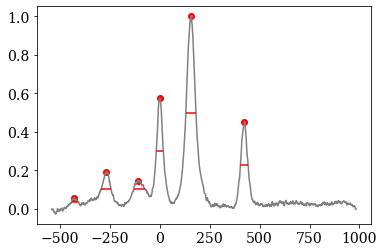

In [32]:
plt.plot(t, y_conv, color="grey")

t, y_conv = np.array(t), np.array(y_conv)

peaks, _ = find_peaks(y_conv, height=0.05, distance=80)

plt.scatter(t[peaks], y_conv[peaks], color="red")
width, height, left, right = peak_widths(y_conv, peaks, rel_height=0.5)
left, right = np.array(np.rint(left), dtype=int), np.array(np.rint(right), dtype=int)
print(left)

for l, r, h, i in zip(left, right, height, peaks):
    plt.scatter(t[i], y_conv[i], s=3) #, label="FWHM = {} GHz, Rel.height = {}".format(round((t[r]-t[l]), 1), round(2*h,1)))
    plt.hlines(y=h, xmin=t[l], xmax=t[r], color="red")

t -= t[peaks[0]]
t/= t[peaks[-1]]
t*= 423.6
y_conv /= np.max(y_conv)

In [30]:
def plot_peaks(y, label=None):
    peaks, _ = find_peaks(y, height=0.05, distance=80)
    width, height, left, right = peak_widths(y_conv, peaks, rel_height=0.5)
    left, right = np.array(np.rint(left), dtype=int), np.array(np.rint(right), dtype=int)
    
    for l, r, h, i, c in zip(left, right, height, peaks, color):
    plt.scatter(t[i], y_conv[i], 
                s=30 , 
                label="FWHM = {} MHz, Rel.height = {}".format(round((t[r]-t[l]), 1), round(2*h,1)), 
                color=c)
    plt.hlines(y=h, xmin=t[l], xmax=t[r], color=c)

IndentationError: expected an indented block after 'for' statement on line 6 (3840939491.py, line 7)

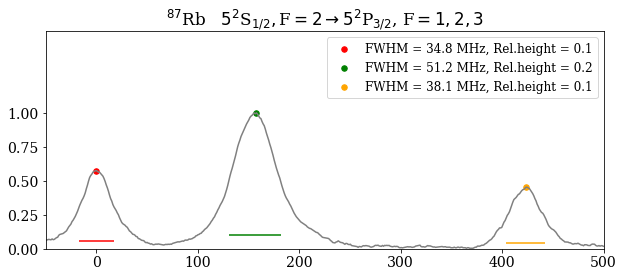

In [31]:
plt.figure(figsize=(10, 4))
plt.plot(t, y_conv, color="grey")
color = ["red", "green", "orange", "blue", "magenta", "yellowgreen"]
# plt.scatter(t[peaks], y_conv[peaks], color="red")



for l, r, h, i, c in zip(left, right, height, peaks, color):
    plt.scatter(t[i], y_conv[i], 
                s=30 , 
                label="FWHM = {} MHz, Rel.height = {}".format(round((t[r]-t[l]), 1), round(2*h,1)), 
                color=c)
    plt.hlines(y=h, xmin=t[l], xmax=t[r], color=c)

plt.xlim(-50, 500)
plt.ylim(0.0, 1.6)
plt.legend(fontsize=12)
plt.title("$^{87}$Rb" + "   $5^{2}$S" + "$_{1/2}, $F" + "$=2 \\rightarrow $" + "$5^2$P" + "$_{3/2}$" + ", F" + "$=1, 2, 3$")
plt.yticks(np.linspace(0.0, 1.0, 5))
width
plt.savefig("./images/87f2.pdf")

### Остальные переходы

### 85F3

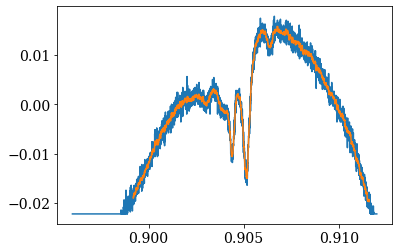

In [434]:
data = pd.read_csv("./data/85f3.csv", sep=",")
t, ch1, ch2 = data["Time [s]"], data['CH0 [V]'], data["CH1 [V]"]

plt.plot(t, ch1)

kernel_size = 10
kernel = np.ones(kernel_size) / kernel_size

a, b = 800, 3900
t = np.array(t)[a:b]
ch1 = np.convolve(ch1, kernel, mode="same")[a:b]

plt.plot(t, ch1)

35603.817195499025


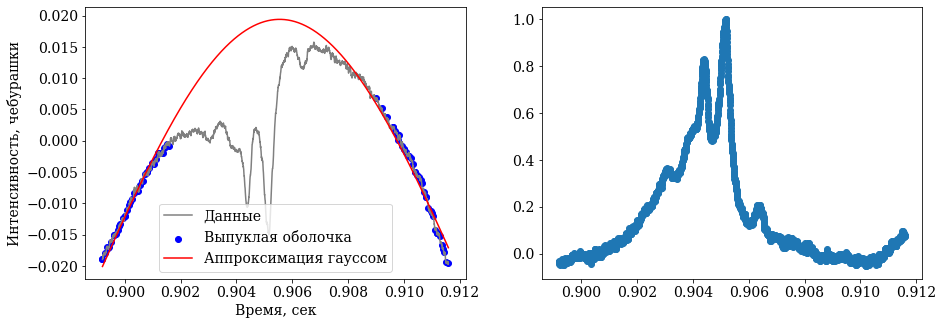

In [549]:
idx = [0, 50, 100, 150, 200,250, 300,350, 400,450, 500,550,600, 2450, 2500,2550, 2600,2650, 2700,2750, 2800,2850, 2900,2950, 3000, -50, -100, -1]
idx = np.append(idx, np.arange(0, 600, 20))
idx = np.append(idx, np.arange(2600, 3090, 20))
# idx = np.append(idx, [180, 1100])

# x1, y1 = points[idx].T
# idx_sorted = np.argsort(x1)
# x1, y1 = x1[idx_sorted], y1[idx_sorted]


# plt.plot(x1, f(x1))
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(t, ch1, label="Данные", color="gray")
plt.scatter(t[idx], ch1[idx], label="Выпуклая оболочка", color="blue")
plt.xlabel("Время, сек")
plt.ylabel("Интенсивность, чебурашки")


popt, pcov = curve_fit(mode, t[idx], ch1[idx], p0=[0.15, 0.907, 0.03, -0.03])
sigma = popt[0]
fwhm = sigma*np.sqrt(8 * np.log(2))
coef = -0.58 / fwhm * 1e3
print(coef)
plt.plot(t, mode(t, *popt), color="red", label="Аппроксимация гауссом")
plt.legend()


plt.subplot(122)
y = -ch1 + mode(t, *popt)
y /= np.max(y)
plt.scatter(t, y)




# peaks, _ = find_peaks(y, height=0.03, distance=90)
# peaks = peaks[[0, 1, 2, 3, 4, 6]]

# x = np.array(t)
# x -= x[peaks[4]]
# x *= coef


# width, height, left, right = peak_widths(np.array(y), peaks, rel_height=0.5)
# step = np.mean(x[1:] - x[:-1])
# width *= step

# p_init = []
# for p, w, h in zip(peaks, width, height):
#     g, a, m = w, h, x[p]
#     p_init.append([g, a, m])
# p_init = np.ravel(p_init)
# print(p_init)


# popt, pcov = curve_fit(lorenz_sum, x, y, p0=p_init)

# g1, a1, m1, g2, a2, m2, g3, a3, m3, g4, a4, m4,g5, a5, m5, g6, a6, m6 = popt
# G = np.array([g1, g2, g3, g4, g5, g6])
# A = np.array([a1, a2, a3, a4, a5, a6])
# M = [m1, m2, m3, m4, m5, m6]


# temp_m = m1
# temp_a = np.max(A)
# x -= temp_m
# y /= temp_a

# M -= temp_m
# A /= temp_a

# popt_corrected = []
# for i in range(6):
#     popt_corrected.append(G[i])
#     popt_corrected.append(A[i])
#     popt_corrected.append(M[i])
    
# print(M[-1])
    
# plt.scatter(np.array(x)[peaks], np.array(y)[peaks], color="blue", label="Оценка координат пиков", s=100, alpha=0.5, zorder=3)
# plt.scatter(x, y, color="silver", label="Данные без допплера", s=20)
# plt.plot(x, lorenz_sum(x, *popt_corrected), color="red", label="Аппроксимация")

# plt.xlabel("$\\Delta \\nu$, МГц")
# plt.ylabel("Интенсивность, крокодилы")

# plt.legend()
# plt.tight_layout()

# # plt.savefig("/Users/goloshch/Desktop/Материалы/КРФ ФИАН/SaturatedRb/images/sat_method.pdf")

[-259.87032967 -259.69615385 -259.52197802 ...  279.5521978   279.72637363
  279.90054945]


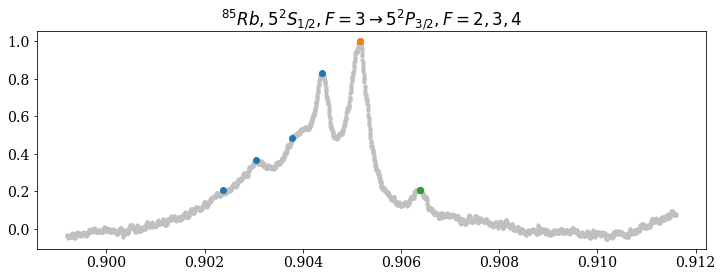

In [574]:
plt.figure(figsize=(12, 4))
plt.title("$^{85}Rb, 5^{2}S_{1/2},F=3 \\rightarrow  5^{2}P_{3/2}, F=2,3,4$")
plt.scatter(t, y, color="silver", s=10)

peaks, _ = find_peaks(y, distance=150, height=0.19)
plt.scatter(t[peaks], y[peaks])
plt.scatter(t[peaks[4]], y[peaks[4]])
plt.scatter(t[peaks[5]], y[peaks[5]])

x = np.array(t)
x -= t[peaks[4]]
x /= (t[peaks[2]]-t[peaks[1]])
x *= 31.7

peaks = peaks[[1, 2, 3, 4, 5]]

print(x)

In [575]:
def lorenz_sum5(x, g1, a1, m1, g2, a2, m2, g3, a3, m3, g4, a4, m4,g5, a5, m5):
    return lorenz(x, g1, a1, m1) + lorenz(x, g2, a2, m2) + lorenz(x, g3, a3, m3) + lorenz(x, g4, a4, m4) + lorenz(x, g5, a5, m5)

[56.882159238806395, 31.602077653507447, 17.0249852023106, 20.988702886013495, 19.997905542228345]


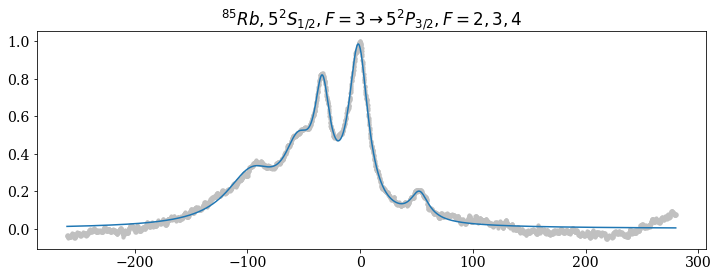

In [576]:
plt.figure(figsize=(12, 4))
plt.title("$^{85}Rb, 5^{2}S_{1/2},F=3 \\rightarrow  5^{2}P_{3/2}, F=2,3,4$")
plt.scatter(x, y, color="silver", s=10)


m1, m2, m3, m4, m5 = x[peaks]

width, height, left, right = peak_widths(y, peaks, rel_height=0.5)
step = np.mean(x[1:] - x[:-1])
width *= step

a1, a2, a3, a4, a5 = height
g1, g2, g3, g4, g5 = width

popt, pcov = curve_fit(lorenz_sum5, x[:-300], y[:-300], p0 = [g1/1.5, a1, m1+20, g2, a2, m2, g3, a3, m3, g4, a4, m4, g5, a5, m5])

plt.plot(x, lorenz_sum5(x, *popt))


G = []
A = []
M = []
for i in range(0, len(popt), 3):
    G.append(popt[i])
    A.append(popt[i+1])
    M.append(popt[i+2])
    
print(G)

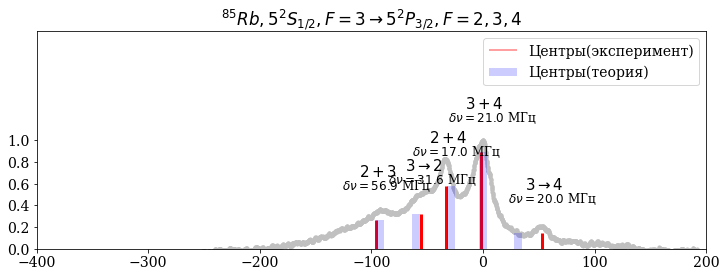

In [579]:
plt.figure(figsize=(12, 4))
plt.title("$^{85}Rb, 5^{2}S_{1/2},F=3 \\rightarrow  5^{2}P_{3/2}, F=2,3,4$")
plt.scatter(x, y, color="silver", s=10)

names = ["$2 + 3$", "$3 \\rightarrow 2$", "$2+4$", "$3+4$", "$3 \\rightarrow 4$"]
teor_cord = np.array([0, 31.7, 63.4, 92.02, 123.72, 184.04]) - 92.02
# teor_cord = teor_cord[::-1]
for g, a, m, n in zip(G, A, M, names):

    plt.vlines(x=m, ymin=0.0, ymax=a, color="red", linewidth=3)
    plt.annotate(xy=(m-15, a+0.4), text=n, fontsize=15)
    plt.annotate(xy=(m-30, a+0.28), text="$\delta \\nu ={}$ МГц".format(round(g,1)), fontsize=12)
plt.vlines(x=0.0, ymin=0.0, ymax=0.0, color="red", label="Центры(эксперимент)", zorder=10, alpha=0.5)
    

    
for g, a, m in zip(G, A, teor_cord):
    plt.vlines(x=m, ymin=0.0, ymax=a, color="blue", linewidth=8, alpha=0.2)
plt.vlines(x=0.0, ymin=0.0, ymax=0.0, color="blue", label="Центры(теория)", linewidth=8, alpha=0.2)
    
    
plt.xlim(-400, 200)
plt.ylim(0.0, 2.0)
plt.yticks(np.arange(0.0, 1.1, 0.2))
plt.legend()

In [2]:
data = pd.read_csv("./data/a0.csv", sep=",")
t, ch1, ch2 = data["Time [s]"], data['CH0 [V]'], data["CH1 [V]"]


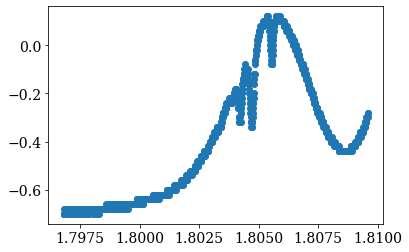

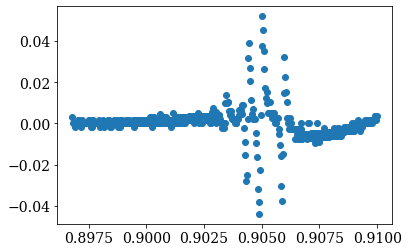

In [16]:
data = pd.read_csv("./data_17.01.2022/abcd.csv")
t, ch1, ch2 = data["Time [s]"], data['CH0 [V]'], data["CH1 [V]"]


a, b = 200, 3500
n = 8
# plt.scatter(t[a:b], ch1[a:b])

plt.scatter(t[a:b:n], np.gradient(np.exp(ch1[a:b:n])))